In [1]:
from os import listdir
import string
 # load doc into memory
def load_doc(filename):
# open the file as read only
    file = open(filename, encoding='utf-8')
# read all text
    text = file.read()
# close the file
    file.close()
    return text

In [2]:
def load_stories(directory):
    stories = list()
    for name in listdir(directory):
        filename = directory +'/'+name
# load document
        doc = load_doc(filename)
        
        stories.append(doc)
    return stories
    #return doc

### Loading all the documents:

In [3]:
directory = 'D:/asss/cnn/stories/'
stories = load_stories(directory)
print('Loaded Stories %d' % len(stories))

Loaded Stories 92579


In [4]:
#printing one of the document to test the document loaded
#print(stories[90000])

In [5]:
#checking the datatype of the loaded documents
type(stories)

list

#### importing the required libraries

In [6]:
pip install  --upgrade gensim

Requirement already up-to-date: gensim in c:\users\subbaramireddy\anaconda3\lib\site-packages (3.8.3)
Note: you may need to restart the kernel to use updated packages.


In [7]:
import pandas as pd
import re
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
np.random.seed(2018)
import nltk
nltk.download('wordnet')
stemmer =SnowballStemmer('english')
from sklearn.feature_extraction.text import CountVectorizer
#from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.decomposition import LatentDirichletAllocation

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\SUBBARAMIREDDY\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


#### These DataFrame contains the all the documents of the corpus:

In [8]:
#creating the dataframe for the given data
text = pd.DataFrame(data=stories,columns=['col'],index=None)
text.head()

,col
0,It's official: U.S. President Barack Obama wan...
1,(CNN) -- Usain Bolt rounded off the world cham...
2,"Kansas City, Missouri (CNN) -- The General Ser..."
3,Los Angeles (CNN) -- A medical doctor in Vanco...
4,(CNN) -- Police arrested another teen Thursday...


##### Here the data Frames  column has all the unwanted stuff in each document we makes our model complex we have to remove the all the uncessary things.

#### In order to remove the unwanted stuff from text data ,we have to do some preprocessing steps in NLP:

##### Preprocessing the data:
    1.Remove punctuation,commas etc;
    2.Remove stopwords
    3.Lemmatization/Stemming

In [9]:
### Function to clean the text data like removing unneccesary things like square brackets, remove punctuation and remove words containing numbers.'''
    
def clean_text(text):
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation),'', text)
    text = re.sub(r'\w*\d\w*', ' ', text)
    text = re.sub(r'CNN','',text)
    text = re.sub(r'@highlight',' ',text)
    text = re.sub(r'\n',' ',text)
    return text

In [10]:
#applying the function to the dataframe
text['col'] = text['col'].apply(clean_text)
text.head(1)

,col
0,Its official US President Barack Obama wants l...


#### Here the punctuation are removed from the dataframe.

#### Applying Lemmatization and removing stopwords

In [11]:
#### Preprocessing the text data to get the required root word and removing stopwords for  all the words in data
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))
# Tokenize and lemmatize
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

In [12]:
#apply function to the data and taking only limited amount of the data
processed_docs = text['col'][0:10000].map(preprocess)


#### As it too complex to run all the data at once i am taking only 10000 documents for further processing

In [44]:
#checking that words are obtained  the rootword.
processed_docs[:10][0][9]

'syria'

#### After Lemmatization we get  rootwords of the documents like offical --  office etc;
#### And stopwords are removed Hence the data is clean 

In [14]:
#creating the dictionary for our convinence
dictionary = gensim.corpora.Dictionary(processed_docs)
dictionary[1000]

'complex'

In [15]:
#print the words of dictionary
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10000:
        break

0 abl
1 accord
2 account
3 action
4 address
5 administr
6 advis
7 aggress
8 agre
9 alassad
10 alexei
11 alhalqi
12 alleg
13 alli
14 altern
15 ambassador
16 americanswer
17 amid
18 analyst
19 analyz
20 anchor
21 angel
22 announc
23 antiwar
24 appear
25 applaud
26 approv
27 arab
28 argu
29 armi
30 ascertain
31 ask
32 assad
33 assault
34 assert
35 asset
36 attack
37 attempt
38 august
39 author
40 back
41 banner
42 barack
43 base
44 bashar
45 battl
46 believ
47 belong
48 bergen
49 blame
50 blow
51 bodi
52 boehner
53 bomb
54 british
55 broadcast
56 busi
57 call
58 cameron
59 cantor
60 carri
61 case
62 cathi
63 chair
64 chairman
65 challeng
66 chemic
67 children
68 china
69 cite
70 clear
71 climb
72 coalit
73 collect
74 come
75 comment
76 committe
77 communiti
78 complet
79 concern
80 confer
81 confront
82 congress
83 congression
84 consid
85 constitut
86 consult
87 continu
88 council
89 countri
90 cours
91 cri
92 crime
93 crisi
94 critic
95 damascus
96 danger
97 david
98 death
99 debat
100 

1190 ploy
1191 polici
1192 popul
1193 popular
1194 poverti
1195 process
1196 produc
1197 profil
1198 proof
1199 prove
1200 racial
1201 ralli
1202 rampant
1203 recent
1204 recogn
1205 registr
1206 reid
1207 research
1208 respect
1209 rest
1210 rich
1211 rivera
1212 ronstadt
1213 saenz
1214 segment
1215 session
1216 shakira
1217 sharp
1218 shove
1219 simpli
1220 singer
1221 size
1222 slam
1223 socal
1224 societi
1225 soler
1226 sophist
1227 southern
1228 split
1229 stop
1230 survey
1231 suspicion
1232 texa
1233 thoma
1234 throat
1235 tortur
1236 tourism
1237 tradit
1238 train
1239 trampl
1240 transport
1241 twist
1242 undermin
1243 undocu
1244 union
1245 unveil
1246 uproar
1247 vigor
1248 voic
1249 void
1250 voter
1251 weve
1252 worri
1253 wors
1254 wrigley
1255 york
1256 access
1257 advantag
1258 advertis
1259 alison
1260 aris
1261 balanc
1262 bargain
1263 bicycl
1264 braley
1265 breakout
1266 bright
1267 bruce
1268 burk
1269 cassidi
1270 caughtontap
1271 central
1272 charter
1273 chick

2190 profession
2191 put
2192 quick
2193 rare
2194 recogniz
2195 revenu
2196 scope
2197 seri
2198 setup
2199 shootout
2200 slow
2201 soccer
2202 spanish
2203 sponsorship
2204 teammat
2205 torr
2206 unimagin
2207 unsur
2208 wrong
2209 bed
2210 beneath
2211 bunker
2212 cart
2213 cave
2214 ceil
2215 char
2216 compound
2217 contain
2218 correspond
2219 corridor
2220 couch
2221 door
2222 dub
2223 explor
2224 extend
2225 flashlight
2226 furious
2227 gadhafi
2228 golf
2229 hotel
2230 inner
2231 labyrinth
2232 libyan
2233 liter
2234 lob
2235 method
2236 moammar
2237 navig
2238 neighborhood
2239 onair
2240 passageway
2241 peek
2242 pitchdark
2243 progadhafi
2244 rang
2245 rixo
2246 roof
2247 room
2248 sanctum
2249 section
2250 shelf
2251 shell
2252 sidner
2253 sight
2254 stroll
2255 studio
2256 sturdi
2257 tap
2258 tripoli
2259 tunnel
2260 underground
2261 underworld
2262 videotap
2263 wall
2264 whos
2265 wide
2266 wind
2267 absolut
2268 advic
2269 agent
2270 aid
2271 antiterror
2272 argument
2

3315 palio
3316 pasola
3317 pinar
3318 pour
3319 prize
3320 purifi
3321 ride
3322 rider
3323 ritual
3324 royal
3325 sacr
3326 saint
3327 samurai
3328 scene
3329 siena
3330 ski
3331 skijor
3332 snowcap
3333 snowi
3334 somanomaoi
3335 spear
3336 spearwield
3337 spectat
3338 spill
3339 squar
3340 straight
3341 sumba
3342 sword
3343 threeday
3344 thunder
3345 trail
3346 transform
3347 turf
3348 tuscani
3349 violent
3350 weather
3351 weird
3352 welfar
3353 abdelati
3354 ceasefir
3355 delavekoura
3356 dimitri
3357 droutsa
3358 elinda
3359 envoy
3360 greek
3361 grigori
3362 houda
3363 labropoulou
3364 malta
3365 natur
3366 obeidi
3367 papandreou
3368 reiter
3369 tunisia
3370 zaghdoudi
3371 afford
3372 backlog
3373 basket
3374 bear
3375 catherin
3376 clearcut
3377 egg
3378 feel
3379 frustrat
3380 fulfil
3381 garcia
3382 lifelong
3383 mess
3384 petit
3385 sergio
3386 shoichet
3387 singular
3388 son
3389 stick
3390 stubborn
3391 super
3392 uphold
3393 visa
3394 accumul
3395 andi
3396 armen
3397 

4231 yoonjung
4232 accommod
4233 adriana
4234 aila
4235 amaro
4236 arizonastyl
4237 asylum
4238 behav
4239 bunch
4240 callous
4241 ceferino
4242 claudia
4243 compass
4244 compassion
4245 confin
4246 counsel
4247 credibl
4248 darizona
4249 dcalifornia
4250 defer
4251 defiant
4252 diaz
4253 dillinoi
4254 din
4255 dismiss
4256 dreamer
4257 dreamersth
4258 dtexa
4259 eloy
4260 expedi
4261 fairi
4262 felixgarcia
4263 grijalva
4264 gutierrez
4265 hall
4266 heartwarm
4267 hinojosa
4268 honda
4269 idol
4270 inconveni
4271 king
4272 leon
4273 leopold
4274 lizbeth
4275 lookatm
4276 lui
4277 lulu
4278 lung
4279 maniac
4280 marco
4281 maria
4282 mario
4283 martinezvaldez
4284 mateojimenez
4285 narciss
4286 navarrett
4287 orneri
4288 parol
4289 pend
4290 penichevarga
4291 persecut
4292 potomac
4293 qualifi
4294 raul
4295 reenter
4296 rep
4297 repress
4298 ruben
4299 ruckus
4300 saavedra
4301 santiago
4302 self
4303 selfserv
4304 sincer
4305 stink
4306 straw
4307 stunt
4308 suppos
4309 theyd
4310 th

5431 revisit
5432 talkedabout
5433 texass
5434 thrive
5435 treati
5436 visitor
5437 aguirr
5438 aint
5439 alcaraz
5440 amanda
5441 anthem
5442 anton
5443 anymor
5444 applaus
5445 asham
5446 augusta
5447 ballad
5448 cartoonist
5449 chicana
5450 chicano
5451 chon
5452 cindi
5453 cyrus
5454 darker
5455 deactiv
5456 demograph
5457 denounc
5458 derogatori
5459 display
5460 faze
5461 feedback
5462 gilmor
5463 groh
5464 idiot
5465 juan
5466 lacey
5467 lalo
5468 mariachi
5469 matt
5470 mexicanamerican
5471 microblogg
5472 multicultur
5473 natl
5474 noriega
5475 nword
5476 out
5477 outlook
5478 persist
5479 racism
5480 racist
5481 rant
5482 rosa
5483 scumbag
5484 sebastien
5485 sing
5486 sneak
5487 spur
5488 trend
5489 tumblr
5490 ucla
5491 unkind
5492 vocifer
5493 alik
5494 bout
5495 box
5496 bradley
5497 conclus
5498 contenti
5499 demon
5500 filipino
5501 heavyweight
5502 instinct
5503 lennox
5504 loser
5505 marquez
5506 notion
5507 pacquiao
5508 perfect
5509 prefight
5510 rematch
5511 resurr

6439 vendywin
6440 warm
6441 whereabout
6442 wooster
6443 wyth
6444 yellow
6445 yorker
6446 zagatr
6447 afloat
6448 artifici
6449 attrit
6450 bump
6451 civic
6452 clerk
6453 cod
6454 deliveri
6455 dmassachusett
6456 downsiz
6457 earner
6458 ecommerc
6459 expedit
6460 fedex
6461 found
6462 fulcrum
6463 handler
6464 ideologu
6465 introduc
6466 layoff
6467 lynch
6468 mainten
6469 overnight
6470 overpric
6471 parcel
6472 peak
6473 philip
6474 plant
6475 postal
6476 prefund
6477 quasicorpor
6478 repeal
6479 responsibilti
6480 retire
6481 rippl
6482 selfsupport
6483 stamp
6484 tsunami
6485 underpin
6486 unnecessari
6487 usp
6488 vener
6489 wealth
6490 wildcat
6491 workforc
6492 apparatus
6493 ardent
6494 avers
6495 beast
6496 booster
6497 brass
6498 bulwark
6499 cabl
6500 counterweight
6501 disgruntl
6502 erod
6503 harken
6504 indispens
6505 innat
6506 iranian
6507 lament
6508 lebanon
6509 margaret
6510 mediat
6511 messier
6512 midlevel
6513 nucleararm
6514 reluct
6515 sadat
6516 salari
6517

7438 ear
7439 felin
7440 four
7441 jkltoraay
7442 kati
7443 kitti
7444 legion
7445 linkin
7446 mama
7447 meow
7448 mimmi
7449 mrsunlawy
7450 notkennyrog
7451 okay
7452 origami
7453 pancak
7454 paraphernalia
7455 pluto
7456 pointi
7457 purri
7458 rapper
7459 retweet
7460 ricochet
7461 sanrio
7462 script
7463 shinoda
7464 sum
7465 superstar
7466 twoleg
7467 whisker
7468 whoa
7469 wikipedia
7470 yano
7471 clot
7472 cranial
7473 dura
7474 gland
7475 hematoma
7476 kirchner
7477 neurolog
7478 scoccimarro
7479 subdur
7480 thyroid
7481 vessel
7482 agricultur
7483 apathet
7484 bun
7485 cinnamon
7486 disaffect
7487 dolphin
7488 don
7489 hideout
7490 illjudg
7491 leather
7492 lykketoft
7493 mogen
7494 musclebound
7495 nonvot
7496 norgaard
7497 orgi
7498 perenni
7499 persuad
7500 sharpli
7501 shortliv
7502 stubblechin
7503 superhero
7504 toy
7505 trouser
7506 upcom
7507 villainesqu
7508 voteman
7509 vulgar
7510 waistcoat
7511 waterski
7512 backward
7513 ballmer
7514 band
7515 basketbal
7516 bleche

8688 batch
8689 bedroom
8690 censorship
8691 chemist
8692 clan
8693 conceiv
8694 cur
8695 deduc
8696 detector
8697 duckburg
8698 fantas
8699 fasten
8700 flesh
8701 floss
8702 foam
8703 footnot
8704 forehead
8705 gaspar
8706 graceland
8707 hairstyl
8708 huddl
8709 infiltr
8710 insignia
8711 intact
8712 intermedi
8713 invent
8714 jumpsuit
8715 kingpin
8716 kkks
8717 klan
8718 klux
8719 kryptonit
8720 krøyer
8721 lightn
8722 logo
8723 marvel
8724 memor
8725 mentalfloss
8726 mentalflosscom
8727 methylen
8728 mock
8729 modernday
8730 mumbl
8731 mutual
8732 mystiqu
8733 nab
8734 nitrogen
8735 olsen
8736 osmot
8737 paragraph
8738 parker
8739 patent
8740 philosoph
8741 polystyren
8742 postworld
8743 print
8744 privi
8745 prowess
8746 rediscov
8747 resembl
8748 resurg
8749 salesman
8750 sesam
8751 skyrocket
8752 speckl
8753 spiderman
8754 spidey
8755 stetson
8756 storylin
8757 superman
8758 transmitt
8759 tuft
8760 webfoot
8761 adapt
8762 amateur
8763 anthrax
8764 avian
8765 biologist
8766 bios

9938 pennsvill
9939 pointblank
9940 rtexa
9941 rundown
9942 saryan
9943 speer
9944 traitor
9945 chat
9946 granddaught
9947 halfpast
9948 halfway
9949 hawkepetit
9950 inhal
9951 jennif
9952 komisarjevski
9953 lenienc
9954 lethal
9955 molest
9956 agoni
9957 claiborn
9958 claustrophob
9959 clockwork
9960 costum
9961 furnish
9962 gotham
9963 gray
9964 isaac
9965 lazi
9966 lowpric
9967 mizrahi
9968 opera
9969 quieter
9970 salon
9971 seamless
9972 shaker
9973 showroom
9974 sketch
9975 unzip
9976 armenian
9977 assyrian
9978 chaldean
9979 dora
9980 evangel
9981 indirect
9982 kabul
9983 natol
9984 neardaili
9985 orthodox
9986 scourg
9987 sectarian
9988 senseless
9989 simmer
9990 syriac
9991 usafghan
9992 warfar
9993 absente
9994 bipartisan
9995 cling
9996 cubanamerican
9997 firebrand
9998 illsuit
9999 notwithstand
10000 obamacar


#### These will Show us the no.of unique words obtained Before  and after the cleaning data

In [16]:
#checking for no.of words obtained for dictionary from the documents
print('Number of unique words in initital documents:', len(dictionary))
# Filter out words that occur less than 10 documents, or more than 20% of the documents.
dictionary.filter_extremes(no_below=10, no_above=0.2)
print('Number of unique words after removing rare and common words:', len(dictionary))

Number of unique words in initital documents: 71936
Number of unique words after removing rare and common words: 12585


##### converting the dictionary words to bag of words

In [17]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

In [18]:
bow_doc= bow_corpus[1]
for i in range(len(bow_doc)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc[i][0], 
                                                     dictionary[bow_doc[i][0]], 
                                                     bow_doc[i][1]))

Word 0 ("abl") appears 1 time.
Word 2 ("action") appears 1 time.
Word 17 ("anchor") appears 3 time.
Word 32 ("attempt") appears 1 time.
Word 47 ("british") appears 1 time.
Word 52 ("carri") appears 1 time.
Word 61 ("clear") appears 2 time.
Word 64 ("collect") appears 1 time.
Word 65 ("comment") appears 1 time.
Word 68 ("complet") appears 1 time.
Word 69 ("concern") appears 1 time.
Word 82 ("critic") appears 1 time.
Word 109 ("doubt") appears 1 time.
Word 112 ("earlier") appears 1 time.
Word 122 ("express") appears 1 time.
Word 130 ("final") appears 5 time.
Word 138 ("game") appears 1 time.
Word 142 ("global") appears 1 time.
Word 177 ("level") appears 1 time.
Word 182 ("major") appears 1 time.
Word 186 ("matter") appears 1 time.
Word 217 ("posit") appears 1 time.
Word 227 ("problem") appears 1 time.
Word 242 ("relat") appears 1 time.
Word 243 ("remark") appears 1 time.
Word 257 ("russia") appears 2 time.
Word 258 ("russian") appears 1 time.
Word 296 ("team") appears 1 time.
Word 298 ("

#### our  requirement is to get the sentences/topics from given documents related to some topics given
    1.Investiage,
    2.Enterprising, 
    3.Artistic,
    4.Conventional,
    5. Realistic,
    6.Social


#### Hence we are going to use LDA Algorithm :(LatentDirichletAllocation)

##### Also we have to use  countvectorizer  to convert out text to vector format:
#### Applying the LDA model to the data:

In [19]:
vectorizer = CountVectorizer(analyzer='word',       
                             min_df=3,                         
                             stop_words='english',             
                             lowercase=True,                   
                             token_pattern='[a-zA-Z0-9]{3,}',  
                             max_features=3000,             
                            )

data_vectorized = vectorizer.fit_transform(text['col'])
 #we are applying the LDA                                                                      
lda_model = LatentDirichletAllocation(n_components=6, # Number of topics
                                      learning_method='online',
                                      random_state=0,       
                                      n_jobs = -1 ) # Use all available CPUs
      
lda_output = lda_model.fit_transform(data_vectorized)

#### Below fuction will give us the words related to the topics obtained by LDA:

In [20]:
## Function to get the most important  words from the documents related to one another for each topic
def show_topics(vectorizer=vectorizer, lda_model=lda_model, n_words=20):
    keywords = np.array(vectorizer.get_feature_names())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords

topic_keywords = show_topics(vectorizer=vectorizer, lda_model=lda_model, n_words=20)        

# Topic - Keywords Dataframe
df_keywords = pd.DataFrame(topic_keywords)
df_keywords.columns = ['Word '+str(i) for i in range(df_keywords.shape[1])]
df_keywords.index = ['Topic '+str(i) for i in range(df_keywords.shape[0])]
df_keywords.head()

,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14,Word 15,Word 16,Word 17,Word 18,Word 19
Topic 0,said,highlight,people,new,city,water,according,flight,air,area,plane,miles,airport,national,officials,coast,oil,park,passengers,says
Topic 1,said,highlight,government,military,people,united,security,war,president,international,forces,minister,country,killed,states,group,china,north,says,officials
Topic 2,said,highlight,police,told,court,according,case,death,family,authorities,report,statement,man,new,say,says,did,investigation,years,law
Topic 3,highlight,like,people,says,just,said,new,time,years,dont,think,know,life,world,make,way,really,thats,want,going
Topic 4,said,president,obama,highlight,new,house,states,state,government,political,people,health,party,law,republican,congress,campaign,national,years,senate


#### Here the top 20 words related  to each top are obtained 

In [21]:
topicnames = ["Topic" + str(i) for i in range(6)]
docnames = ["Doc" + str(i) for i in range(len(text))]
df_document_topic = pd.DataFrame(np.round(lda_output, 2),columns=topicnames, index=docnames)
topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['topic'] = topic

#### Here we are getting the propability of each topic in each documents related and the document related to which topic from the 
##### Dataframe


In [22]:
df_document_topic.head()

,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,topic
Doc0,0.01,0.63,0.01,0.00,0.35,0.00,1
Doc1,0.00,0.00,0.05,0.00,0.13,0.81,5
Doc2,0.28,0.00,0.15,0.14,0.43,0.00,4
Doc3,0.07,0.00,0.77,0.03,0.07,0.07,2
Doc4,0.00,0.03,0.97,0.00,0.00,0.00,2


In [23]:
df_document_topic.reset_index(inplace=True)
df_sent_topic= pd.merge(text['col'],df_document_topic,left_index=True, right_index=True)
df_sent_topic.drop('index', axis=1, inplace=True)

#### Here we are going to  get the sentences from whole data for each topic in each Document:

In [24]:
df_sent_topic.head(10)

,col,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,topic
0,Its official US President Barack Obama wants l...,0.01,0.63,0.01,0.00,0.35,0.00,1
1,Usain Bolt rounded off the world championshi...,0.00,0.00,0.05,0.00,0.13,0.81,5
2,Kansas City Missouri The General Services Ad...,0.28,0.00,0.15,0.14,0.43,0.00,4
3,Los Angeles A medical doctor in Vancouver Br...,0.07,0.00,0.77,0.03,0.07,0.07,2
4,Police arrested another teen Thursday the si...,0.00,0.03,0.97,0.00,0.00,0.00,2
5,Thousands on Saturday fled the area in south...,0.24,0.76,0.00,0.00,0.00,0.00,1
6,Four groups that advocate for immigrant righ...,0.01,0.00,0.14,0.00,0.84,0.01,4
7,While Labor Day is the unofficial end of summe...,0.01,0.00,0.01,0.00,0.89,0.09,4
8,Gaza City An Italian humanitarian activist a...,0.00,0.57,0.33,0.09,0.00,0.00,1
9,Renowned radio personality Casey Kasem is in...,0.06,0.00,0.81,0.00,0.09,0.04,2


In [25]:
data= pd.merge(df_sent_topic['col'],df_sent_topic['topic'], left_index=True, right_index=True)
data.head()

,col,topic
0,Its official US President Barack Obama wants l...,1
1,Usain Bolt rounded off the world championshi...,5
2,Kansas City Missouri The General Services Ad...,4
3,Los Angeles A medical doctor in Vancouver Br...,2
4,Police arrested another teen Thursday the si...,2


#### Going to get the sentences from the documents based on the words obtained :

In [26]:
data1= pd.merge(df_sent_topic['col'],df_sent_topic['topic'], left_index=True, right_index=True)
data1.head()

,col,topic
0,Its official US President Barack Obama wants l...,1
1,Usain Bolt rounded off the world championshi...,5
2,Kansas City Missouri The General Services Ad...,4
3,Los Angeles A medical doctor in Vancouver Br...,2
4,Police arrested another teen Thursday the si...,2


In [27]:
def label_theme(row):
    if row['topic'] == 0 :
        return 'police/court/case/death/investigation'
    if row['topic'] == 1 :
        return 'team/game/league/players/football/match'
    if row['topic'] == 2 :
        return 'company/health/water/food'
    if row['topic'] == 3:
        return  'know/think/family/really'
    if row['topic']  == 4:
        return 'government/military/security/president/killed'
    if row['topic'] == 5:
        return 'political/law/government/election/republican'
   

In [28]:
data1['words'] = data1.apply (lambda row: label_theme(row), axis=1)
data1.head()

,col,topic,words
0,Its official US President Barack Obama wants l...,1,team/game/league/players/football/match
1,Usain Bolt rounded off the world championshi...,5,political/law/government/election/republican
2,Kansas City Missouri The General Services Ad...,4,government/military/security/president/killed
3,Los Angeles A medical doctor in Vancouver Br...,2,company/health/water/food
4,Police arrested another teen Thursday the si...,2,company/health/water/food


 #### Based on the above function we are getting the sentences based on the words related to each Topic

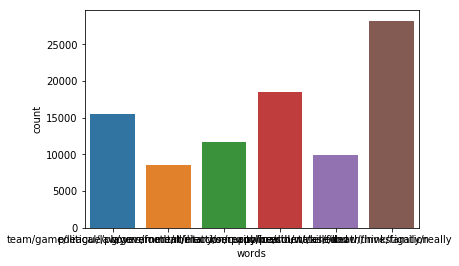

In [29]:
sns.countplot(data1['words'],data=data1)

##### we get the count of sentences with respective to the Words in each sentence

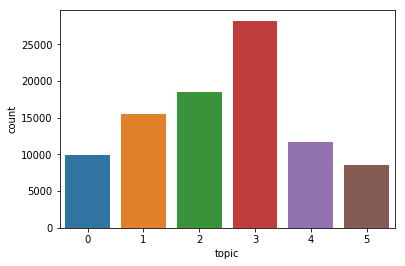

In [30]:
sns.countplot(data1['topic'],data=data1)

##### we get the count of sentences with respective to the Topic in each sentence

##### Here we are getting count of  how many sentences are obtained from the document related to each Topic

In [31]:
#we  are now counting the no.of sentences in documents related to each topic
df_topic_distribution = df_document_topic['topic'].value_counts().reset_index(name="Num Sentences")
df_topic_distribution.columns = ['Topic #', 'Num Sentences']
df_topic_distribution

,Topic #,Num Sentences
0,3,28225
1,2,18531
2,1,15578
3,4,11758
4,0,9877
5,5,8610


#### Resetting the DataFrame according to our requirement:

In [32]:
#renaming the Topic names with our required topics
#These names are decided according to the words obtained for each topic
l = [0,1,2,3,4,5]
m = ['Investigative','Social','Realistic','Artistic','Enterprising','Conventional']
data['topic'].replace(l,m,inplace=True)
data.head(20)

,col,topic
0,Its official US President Barack Obama wants l...,Social
1,Usain Bolt rounded off the world championshi...,Conventional
2,Kansas City Missouri The General Services Ad...,Enterprising
3,Los Angeles A medical doctor in Vancouver Br...,Realistic
4,Police arrested another teen Thursday the si...,Realistic
5,Thousands on Saturday fled the area in south...,Social
6,Four groups that advocate for immigrant righ...,Enterprising
7,While Labor Day is the unofficial end of summe...,Enterprising
8,Gaza City An Italian humanitarian activist a...,Social
9,Renowned radio personality Casey Kasem is in...,Realistic


#### The following words will represent with respective to Its Topic:
#####  For example If a sentence contains the words such as police/court/case/death/investigation the sentence relates Topic Investigative


    1.Investigative:'police/court/case/death/investigation'
    2.Social:'team/game/league/players/football/match'
    3.Realistic:'company/health/water/food'
    4.Artistic:'know/think/family/really'
    5.Enterprising:'government/military/security/president/killed'
    6.Conventional:'political/law/government/election/republican'

#### But according to our requirement we need the dataframe in another way so we have to do some manipulations of data

In [33]:
grouped_df = data.groupby('topic')
df = grouped_df.get_group('Investigative')
#Also we are taking only 100 rows for each topic as it is too complex to run all at a time
df1 = df.rename(columns={'col':'Investiage'},inplace=False)[0:120]
df1.drop('topic',axis='columns', inplace=True)
df1.reset_index(drop=True, inplace=True)
df1.head()

,Investiage
0,If you travel by plane and arriving on time ...
1,Space shuttle Discovery launched just befor...
2,This past week saw severe weather in many pa...
3,A memorial cruise is scheduled to set sail ...
4,Wise men say to look before you leap In Alas...


In [34]:
grouped_df = data.groupby('topic')
df  = grouped_df.get_group('Enterprising')
df2 = df.rename(columns={'col':'Enterprising'},inplace=False)[0:120]
df2.drop('topic',axis='columns', inplace=True)
df2.reset_index(drop=True, inplace=True)
df2.head()

,Enterprising
0,Kansas City Missouri The General Services Ad...
1,Four groups that advocate for immigrant righ...
2,While Labor Day is the unofficial end of summe...
3,WASHINGTON Former Vice President Dick Cheney...
4,Criminals who file fraudulent tax returns by...


In [35]:
grouped_df = data.groupby('topic')
df  = grouped_df.get_group('Conventional')
df3= df.rename(columns={'col':'Conventional'},inplace=False)[0:120]
df3.drop('topic',axis='columns', inplace=True)
df3.reset_index(drop=True, inplace=True)
df3.head()

,Conventional
0,Usain Bolt rounded off the world championshi...
1,Bayern Munich might be licking their wounds ...
2,The big winners of this Formula One season c...
3,European footballs governing body UEFA has r...
4,Rip it up and start again As a Ana Ivanov...


In [36]:
grouped_df = data.groupby('topic')
df  = grouped_df.get_group('Realistic')
df4 = df.rename(columns={'col':'Realistic'},inplace=False)[0:120]
df4.drop('topic',axis='columns', inplace=True)
df4.reset_index(drop=True, inplace=True)
df4.head()

,Realistic
0,Los Angeles A medical doctor in Vancouver Br...
1,Police arrested another teen Thursday the si...
2,Renowned radio personality Casey Kasem is in...
3,For the second time during his papacy Pope Fra...
4,Kathmandu Nepal A ferocious leopard may have...


In [37]:
grouped_df = data.groupby('topic')
df  = grouped_df.get_group('Social')
df5 = df.rename(columns={'col':'Social'},inplace=False)[0:120]
df5.drop('topic',axis='columns', inplace=True)
df5.reset_index(drop=True, inplace=True)
df5.head()

,Social
0,Its official US President Barack Obama wants l...
1,Thousands on Saturday fled the area in south...
2,Gaza City An Italian humanitarian activist a...
3,HAMILTON Bermuda Four Chinese nationals of U...
4,Tripoli Libya Rebels in Tripoli furiously hu...


In [38]:
grouped_df = data.groupby('topic')
df  = grouped_df.get_group('Artistic')
df6 = df.rename(columns={'col':'Artistic'},inplace=False)[0:120]
df6.drop('topic',axis='columns', inplace=True)
df6.reset_index(drop=True, inplace=True)
df6.head()

,Artistic
0,Kyle White now has two pieces of metal to we...
1,Like a stereotypical beauty pageant it looks...
2,Healthcom An essential nutrient found in fish...
3,EWcom Chris Meloni has booked his first postS...
4,Each summer more than people pour into a c...


In [39]:
df7 = pd.merge(pd.merge(df1,df2,left_on=None, right_on=None, left_index=True, right_index=True),df6,left_on=None, right_on=None, left_index=True, right_index=True)
df7.head()

,Investiage,Enterprising,Artistic
0,If you travel by plane and arriving on time ...,Kansas City Missouri The General Services Ad...,Kyle White now has two pieces of metal to we...
1,Space shuttle Discovery launched just befor...,Four groups that advocate for immigrant righ...,Like a stereotypical beauty pageant it looks...
2,This past week saw severe weather in many pa...,While Labor Day is the unofficial end of summe...,Healthcom An essential nutrient found in fish...
3,A memorial cruise is scheduled to set sail ...,WASHINGTON Former Vice President Dick Cheney...,EWcom Chris Meloni has booked his first postS...
4,Wise men say to look before you leap In Alas...,Criminals who file fraudulent tax returns by...,Each summer more than people pour into a c...


In [40]:
total = pd.merge((pd.merge(df3, df4, how='inner',left_on=None, right_on=None, left_index=True, right_index=True)), df5, how='inner',left_on=None, right_on=None, left_index=True, right_index=True)
total.head()

,Conventional,Realistic,Social
0,Usain Bolt rounded off the world championshi...,Los Angeles A medical doctor in Vancouver Br...,Its official US President Barack Obama wants l...
1,Bayern Munich might be licking their wounds ...,Police arrested another teen Thursday the si...,Thousands on Saturday fled the area in south...
2,The big winners of this Formula One season c...,Renowned radio personality Casey Kasem is in...,Gaza City An Italian humanitarian activist a...
3,European footballs governing body UEFA has r...,For the second time during his papacy Pope Fra...,HAMILTON Bermuda Four Chinese nationals of U...
4,Rip it up and start again As a Ana Ivanov...,Kathmandu Nepal A ferocious leopard may have...,Tripoli Libya Rebels in Tripoli furiously hu...


In [41]:
final =pd.merge(df7,total, how='inner',left_on=None, right_on=None, left_index=True, right_index=True)

#### These is the Final OutPut  dataframe required after the data collection:

In [42]:
#It is the required dataframe according to our requirement
final.head()

,Investiage,Enterprising,Artistic,Conventional,Realistic,Social
0,If you travel by plane and arriving on time ...,Kansas City Missouri The General Services Ad...,Kyle White now has two pieces of metal to we...,Usain Bolt rounded off the world championshi...,Los Angeles A medical doctor in Vancouver Br...,Its official US President Barack Obama wants l...
1,Space shuttle Discovery launched just befor...,Four groups that advocate for immigrant righ...,Like a stereotypical beauty pageant it looks...,Bayern Munich might be licking their wounds ...,Police arrested another teen Thursday the si...,Thousands on Saturday fled the area in south...
2,This past week saw severe weather in many pa...,While Labor Day is the unofficial end of summe...,Healthcom An essential nutrient found in fish...,The big winners of this Formula One season c...,Renowned radio personality Casey Kasem is in...,Gaza City An Italian humanitarian activist a...
3,A memorial cruise is scheduled to set sail ...,WASHINGTON Former Vice President Dick Cheney...,EWcom Chris Meloni has booked his first postS...,European footballs governing body UEFA has r...,For the second time during his papacy Pope Fra...,HAMILTON Bermuda Four Chinese nationals of U...
4,Wise men say to look before you leap In Alas...,Criminals who file fraudulent tax returns by...,Each summer more than people pour into a c...,Rip it up and start again As a Ana Ivanov...,Kathmandu Nepal A ferocious leopard may have...,Tripoli Libya Rebels in Tripoli furiously hu...


#### For further processing we need to export DataFrame to CSV file 

In [43]:
final.to_csv('Datacollection.csv',index=False)

#### The 'Datacollection CSV file is the required dataset :contains the  data regarding different topics